In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

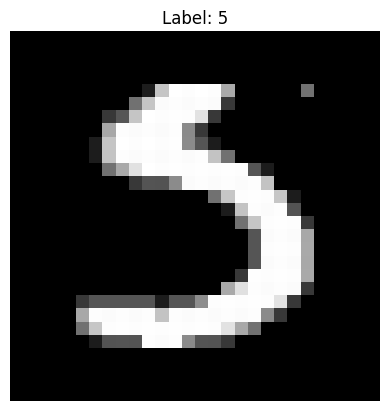

In [2]:
# Первый столбец содержит метку класса (цифру от 0 до 9), а остальные столбцы — значения интенсивностей пикселей (от 0 до 255) в виде строки, представляющей изображение 28x28.

# Загрузка данных из CSV
data = pd.read_csv('data/mnist_train.csv')

# Просмотр структуры данных
# print(data.head(1))  # Вывод первых строк  -label  1x1  1x2  1x3  1x4
# print(data.shape)   # Размерность датасета (60000, 785)

# Выбор первой строки данных
first_row = data.iloc[randint(0,len(data)-1)]

# Извлечение метки и пикселей
label = first_row.iloc[0]  # Метка класса
pixels = first_row[1:].values  # Пиксели изображения

# Преобразование пикселей в массив 28x28
image = pixels.reshape(28, 28).astype(np.uint8)

# Визуализация изображения
plt.title(f"Label: {label}")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [3]:
# Загрузка данных
train_data = pd.read_csv('data/mnist_train.csv')
test_data = pd.read_csv('data/mnist_test.csv')

# Разделение на признаки X и метки y
X_train = train_data.iloc[:, 1:].values  # Все столбцы, кроме первого
y_train = train_data.iloc[:, 0].values   # Первый столбец — метки

# Так же с тестовым набором данных
X_test = test_data.iloc[:, 1:].values
y_test_raw = test_data.iloc[:, 0].values

# Нормализация данных (приведение пикселей к диапазону [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Преобразование меток в one-hot encoding.
# Каждому уникальному значению категории присваивается бинарный вектор,
# в котором все значения равны нулю, кроме индекса категории, который отмечается цифрой 1
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test_raw, num_classes=10)



# Создание модели
model = Sequential([
    Flatten(input_shape=(784,)),  # Входной слой: преобразование 28x28 в вектор длиной 784
    Dense(128, activation='relu'),  # Скрытый слой с 128 нейронами и ReLU-активацией
    Dense(64, activation='relu'),   # Ещё один скрытый слой
    Dense(10, activation='softmax') # Выходной слой для классификации (10 классов)
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


C:\programming_HUB\Machine_Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8642 - loss: 0.4754 - val_accuracy: 0.9534 - val_loss: 0.1478
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9648 - loss: 0.1193 - val_accuracy: 0.9686 - val_loss: 0.1040
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9758 - loss: 0.0779 - val_accuracy: 0.9717 - val_loss: 0.0957
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0553 - val_accuracy: 0.9734 - val_loss: 0.0915
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.9723 - val_loss: 0.0963
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9690 - val_loss: 0.1182
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9910 - loss: 0.0272 - val_accuracy: 0.9745 - val_loss: 0.0968
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9932 - loss: 0.0205 - 

Метка точности

In [4]:
# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовом наборе: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.1203   
Точность на тестовом наборе: 97.56%


Получение предсказания для одного изображения

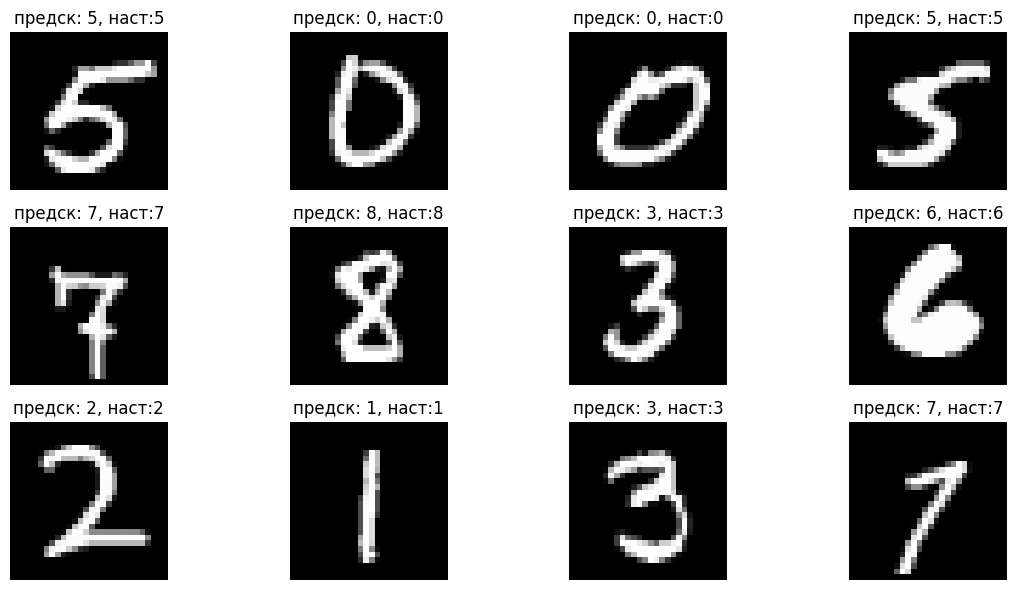

In [5]:
# Визуализация 10 изображений в 2 строки и 5 столбцов
fig, axes = plt.subplots(3, 4, figsize=(12, 6))  # 2 строки, 5 столбцов

for i, ax in enumerate(axes.flat):

    index = randint(0,len(test_data)-1)  # Индекс изображения для предсказания
    image = X_test[index].reshape(1, -1)  # Преобразование в формат (1, 784)

    prediction = model.predict(image, verbose=0)
    predicted_label = np.argmax(prediction)  # Индекс с максимальной вероятностью
    label = y_test_raw[index]

    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.set_title(f"предск: {predicted_label}, наст:{label}")
    ax.axis('off')

plt.tight_layout()
plt.show()
